In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Задание 1

Функция для построения графиков зависимости СКО от `k`:

In [2]:
def make_plot(x, y, theta, distribution):
    plt.title('Распределение {}'.format(distribution))
    plt.xlabel('значения k')
    plt.ylabel('отклонения оценки')
    plt.plot(x, y, label='\u03B8 = {}'.format(theta))
    plt.legend()

Генерация выборки из равномерного распределение с параметром $U[0, \theta]$ и оценка параметра с помощью метода моментов:

In [3]:
def uniform_parameter(theta, n):
    return theta * np.random.uniform(0, 1, n), 'U[0,\u03B8]'

def uniform_estimation(x, k):
    return (np.mean(x ** k) * (k + 1)) ** (1 / k)

Генерация выборки из экспоненциального распределения с параметром $Exp(\theta)$ и оценка параметра с помощью метода моментов:

In [4]:
def exponential_parameter(theta, n):
    return theta * np.random.exponential(1, n), 'Exp(\u03B8)'

def exponential_estimation(x, k):
    return (factorial(k) / np.mean(x ** k)) ** (1 / k)

Считаем отклонение оценки от настоящего параметра:

In [5]:
def stand_dev(size_x, n_samples, theta, distribution, estimation):
    for t in theta:
        k_values = []
        deviation = []
        standard_deviation = []
        for k in range(1, 100):
            k_values.append(k)
            for i in range(n_samples):
                x, name = distribution(t, size_x)
                t_estimation = estimation(x, k)
                deviation.append((t_estimation - t) ** 2)
            standard_deviation.append(np.mean((np.asarray(deviation) / n_samples) ** 0.5))
        make_plot(k_values, standard_deviation, t, name)

Значения, которые принимает $\theta$

In [6]:
theta = [5, 50, 100]

### Равномерное распределение

Размер выборки `size_n` = 100; количество выборок, генерируемых для каждого `k`: `n_samples` = 100

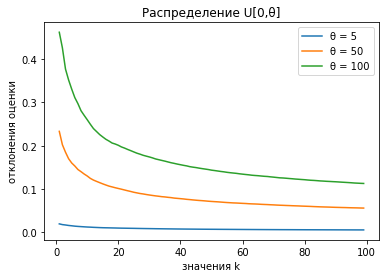

In [7]:
stand_dev(100, 100, theta, uniform_parameter, uniform_estimation)

Из графиков можно заметить, что при оценке параметра методом моментов для равномерного распределения СКО не очень большое. 
Чем больше $\theta$, тем больше и СКО, но при увеличении `k` отклонение уменьшается при любых значениях параметра.


### Экспоненциальное распределение 

Размер выборки `size_n` = 100; количество выборок, генерируемых для каждого `k`: `n_samples` = 100

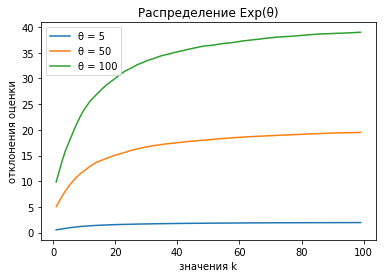

In [8]:
stand_dev(100, 100, theta, exponential_parameter, uniform_estimation)

Из графиков видно, что при оценке параметра методом моментов для экспоненциального распределения СКО значительно
больше по сравнению с предыдущим случаем. Причем при увеличении `k` отклонение становится больше. 